In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
flats_data = pd.read_csv('cian_flats_data.csv', sep=';', header=0)

In [3]:
flats_data.columns

Index(['ID', 'Link', 'Price', 'Rooms', 'Views', 'Square', 'Live Square',
       'Kitchen', 'Floor', 'Total Floors', 'Area', 'Flat number', 'Street',
       'District', 'District 2', 'Description', 'Flat Type', 'Toilet',
       'Balcony', 'Repair', 'Window View', 'Ceiling', 'House Type',
       'House Year', 'Lifts', 'Parking', 'Gas'],
      dtype='object')

In [4]:
flats_data

,ID,Link,Price,Rooms,Views,Square,Live Square,Kitchen,Floor,Total Floors,...,Toilet,Balcony,Repair,Window View,Ceiling,House Type,House Year,Lifts,Parking,Gas
0,256194855,https://krasnodar.cian.ru/sale/flat/256194855/,2280000,1,629,39.2,NaN,NaN,4,7,...,1 совмещенный,1 балкон,Евроремонт,На улицу,NaN,Монолитный,NaN,NaN,NaN,NaN
1,253570915,https://krasnodar.cian.ru/sale/flat/253570915/,2700000,1,409,44.0,NaN,NaN,16,24,...,NaN,1 лоджия,Без ремонта,Во двор,NaN,Монолитный,NaN,2 пасс.,Подземная,NaN
2,254197857,https://krasnodar.cian.ru/sale/flat/254197857/,2300000,1,1,44.5,17.0,12.0,6,7,...,1 совмещенный,1 лоджия,Евроремонт,На улицу,NaN,Кирпичный,2012.0,Есть,NaN,Автономное
3,255817982,https://krasnodar.cian.ru/sale/flat/255817982/,1950000,1,606,38.8,16.6,13.6,3,7,...,NaN,1 балкон,Евроремонт,NaN,NaN,Кирпичный,NaN,4 всего,NaN,NaN
4,254876805,https://krasnodar.cian.ru/sale/flat/254876805/,4150000,1,358,38.8,10.0,18.0,16,18,...,1 совмещенный,1 балкон,NaN,Во двор,NaN,Монолитно кирпичный,2018.0,Есть,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478,252348577,https://maykop.cian.ru/sale/flat/252348577/,900000,0,545,33.0,33.0,NaN,1,2,...,NaN,NaN,Косметический,NaN,NaN,Блочный,NaN,NaN,NaN,NaN
5479,249423954,https://maykop.cian.ru/sale/flat/249423954/,1270000,0,209,27.4,12.9,6.9,4,5,...,NaN,1 балкон,Без ремонта,Во двор,NaN,Монолитно кирпичный,NaN,NaN,NaN,NaN
5480,254912285,https://maykop.cian.ru/sale/flat/254912285/,1070000,0,10,19.0,NaN,NaN,4,5,...,1 совмещенный,1 балкон,NaN,Во двор,NaN,NaN,NaN,NaN,NaN,NaN
5481,245772257,https://maykop.cian.ru/sale/flat/245772257/,1250000,0,163,45.0,NaN,NaN,2,2,...,1 совмещенный,1 лоджия,Косметический,На улицу и двор,NaN,Блочный,NaN,NaN,Наземная,NaN


In [5]:
total = flats_data.isnull().sum().sort_values(ascending=False)
percent = (flats_data.isnull().sum() / flats_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
District 2,5046,0.920299
Gas,4787,0.873062
Parking,4309,0.785884
Ceiling,3824,0.697428
Window View,3103,0.565931
House Year,2387,0.435346
Lifts,1894,0.345431
District,1821,0.332117
Toilet,1735,0.316433
Balcony,1524,0.277950


In [6]:
flats_data.describe()

,ID,Price,Rooms,Views,Square,Live Square,Kitchen,Floor,Total Floors,House Year
count,5.483000e+03,5.483000e+03,5483.000000,5483.000000,5483.000000,4704.000000,4296.000000,5483.000000,5483.000000,3096.000000
mean,2.520911e+08,5.513843e+06,1.913916,107.767645,65.564636,35.188244,13.638710,7.665694,13.815247,2009.727067
std,7.808291e+06,6.424253e+06,1.192474,144.073836,42.963072,22.155926,6.736125,5.375574,6.575549,16.502297
min,1.653596e+08,3.500000e+05,0.000000,0.000000,12.000000,1.000000,1.000000,-1.000000,1.000000,1903.000000
25%,2.515827e+08,2.200000e+06,1.000000,21.000000,38.000000,18.700000,10.000000,3.000000,9.000000,2011.000000
50%,2.549507e+08,3.200000e+06,2.000000,58.000000,60.000000,33.000000,13.000000,6.000000,16.000000,2016.000000
75%,2.560617e+08,6.100000e+06,3.000000,131.000000,78.000000,44.000000,15.000000,11.000000,18.000000,2018.000000
max,2.572175e+08,8.000000e+07,6.000000,999.000000,530.000000,360.000000,70.000000,25.000000,26.000000,2021.000000


In [7]:
flats_data['Price'].describe()

count    5.483000e+03
mean     5.513843e+06
std      6.424253e+06
min      3.500000e+05
25%      2.200000e+06
50%      3.200000e+06
75%      6.100000e+06
max      8.000000e+07
Name: Price, dtype: float64

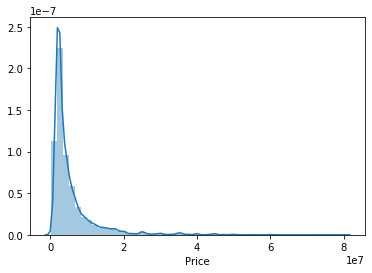

In [8]:
sns.distplot(flats_data['Price'])

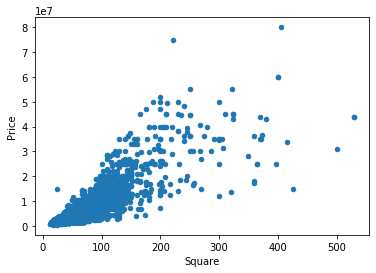

In [9]:
var = 'Square'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
concat.plot.scatter(x=var, y='Price')

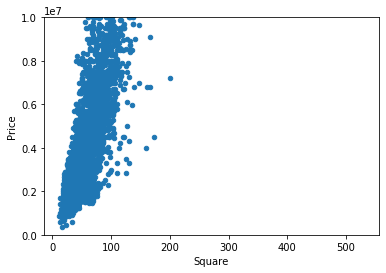

In [10]:
concat.plot.scatter(x=var, y='Price', ylim=(0, 10000000))

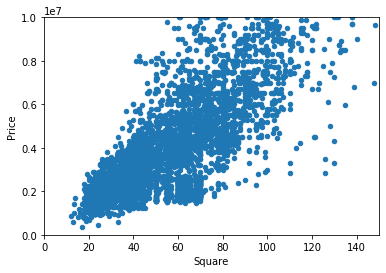

In [11]:
concat.plot.scatter(x=var, y='Price', xlim=(0, 150), ylim=(0, 10000000))

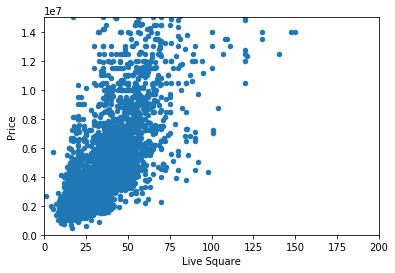

In [12]:
var = 'Live Square'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
concat.plot.scatter(x=var, y='Price', xlim=(0, 200), ylim=(0, 15000000))

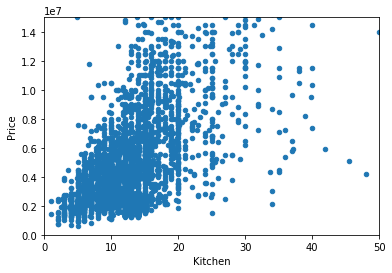

In [13]:
var = 'Kitchen'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
concat.plot.scatter(x=var, y='Price', xlim=(0, 50), ylim=(0, 15000000))

(-0.5, 6.5, -3632500.0, 83982500.0)

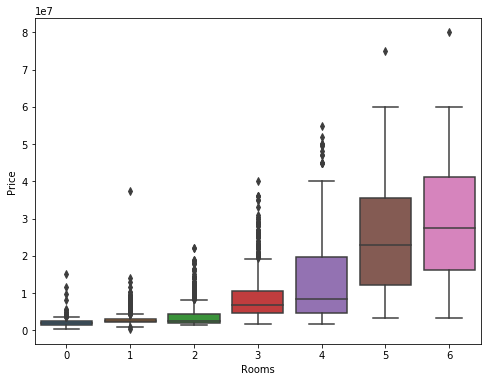

In [14]:
var = 'Rooms'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()

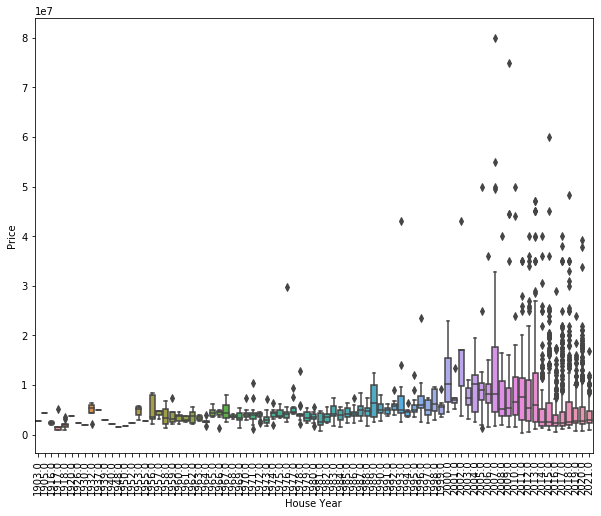

In [15]:
var = 'House Year'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 <a list of 83 Text xticklabel objects>)

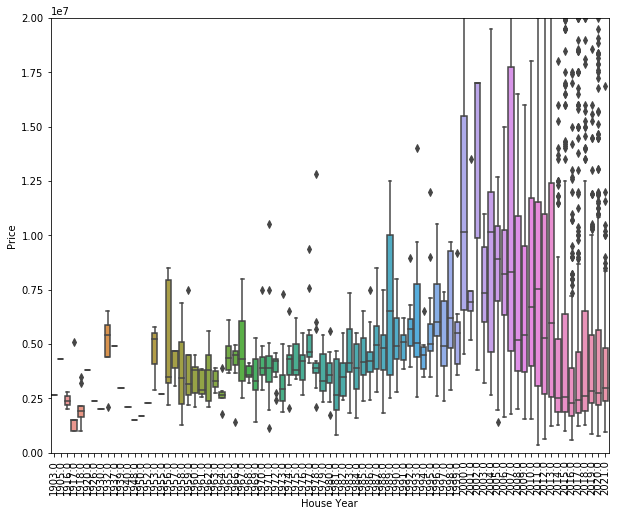

In [16]:
var = 'House Year'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis(ymin=0, ymax=20000000)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

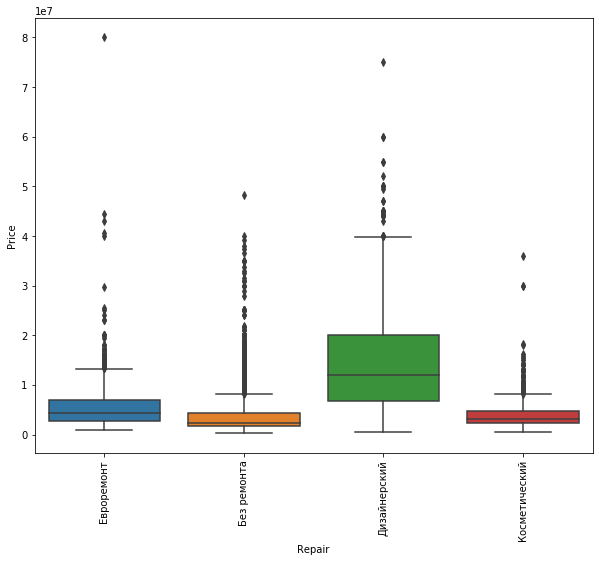

In [17]:
var = 'Repair'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

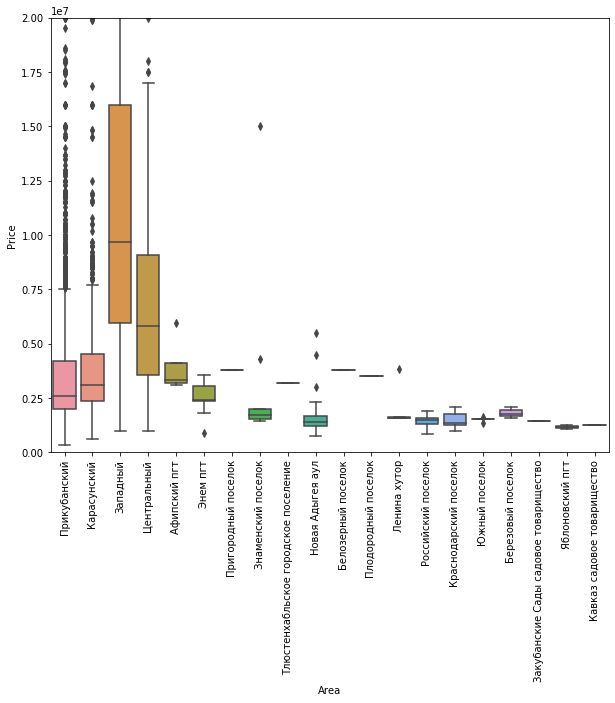

In [18]:
var = 'Area'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis(ymin=0, ymax=20000000)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

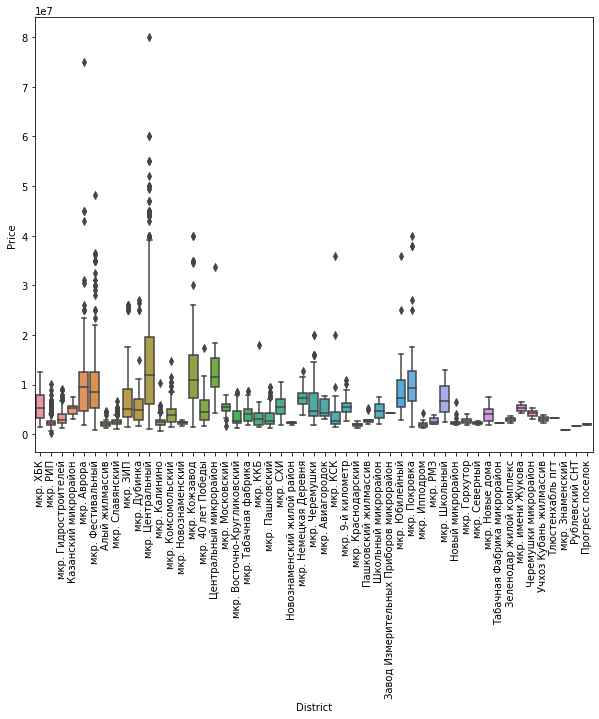

In [19]:
var = 'District'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

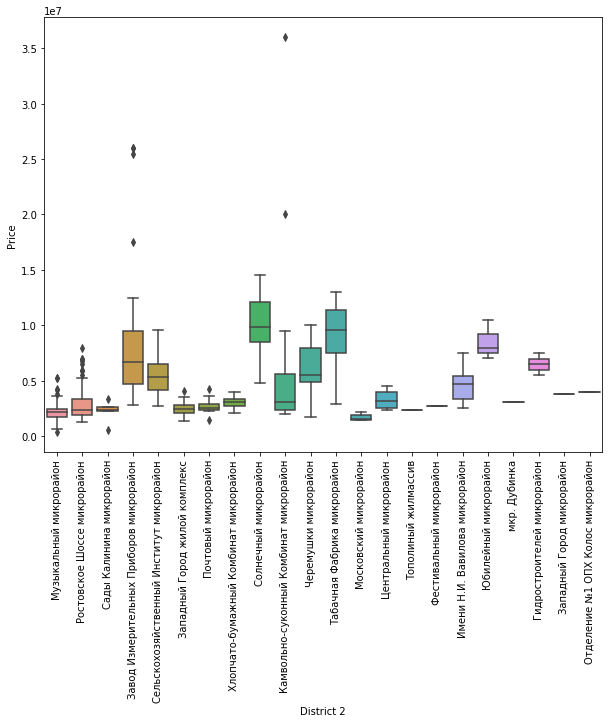

In [20]:
var = 'District 2'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

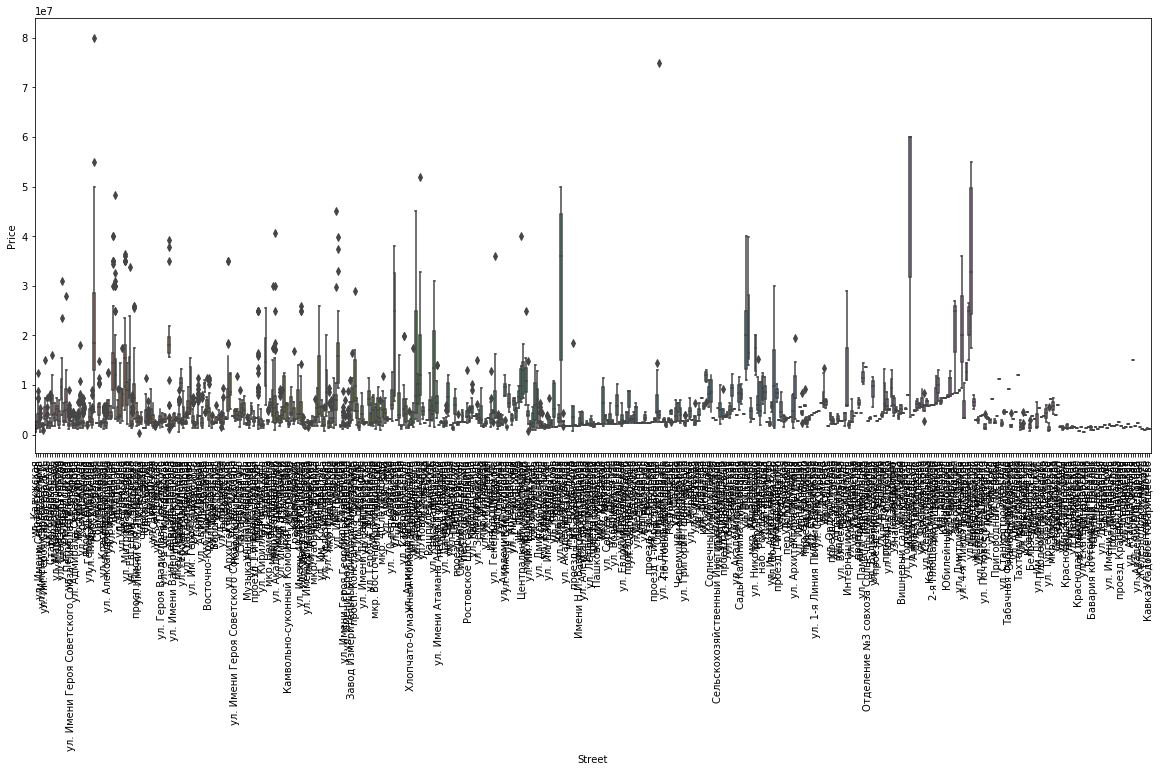

In [21]:
var = 'Street'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

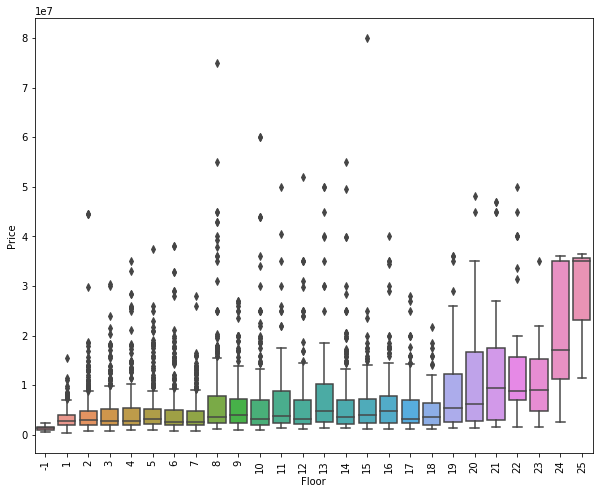

In [22]:
var = 'Floor'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

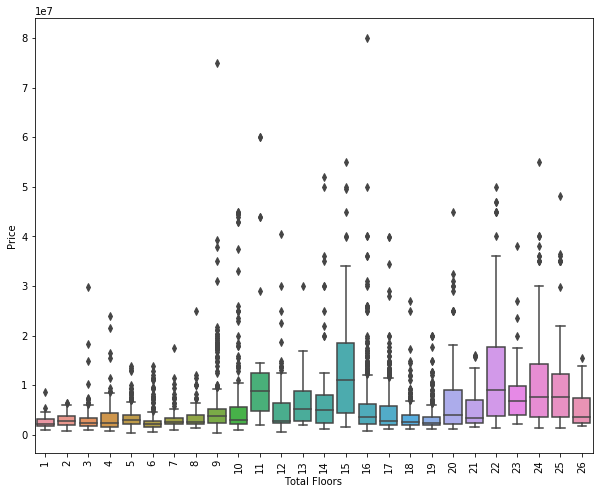

In [23]:
var = 'Total Floors'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

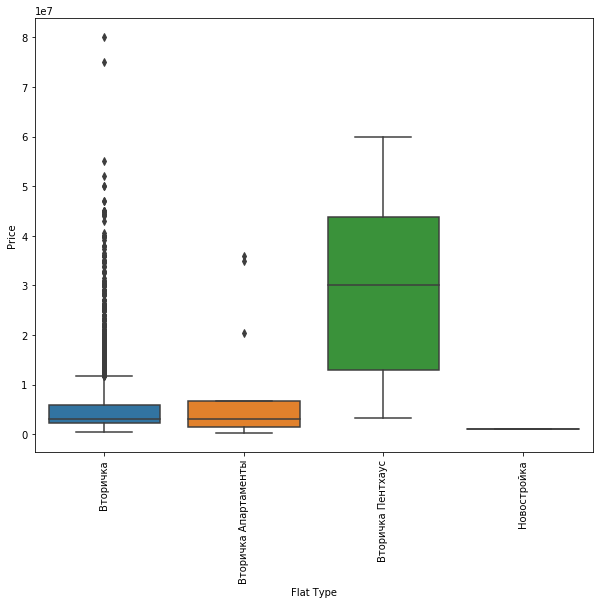

In [24]:
var = 'Flat Type'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

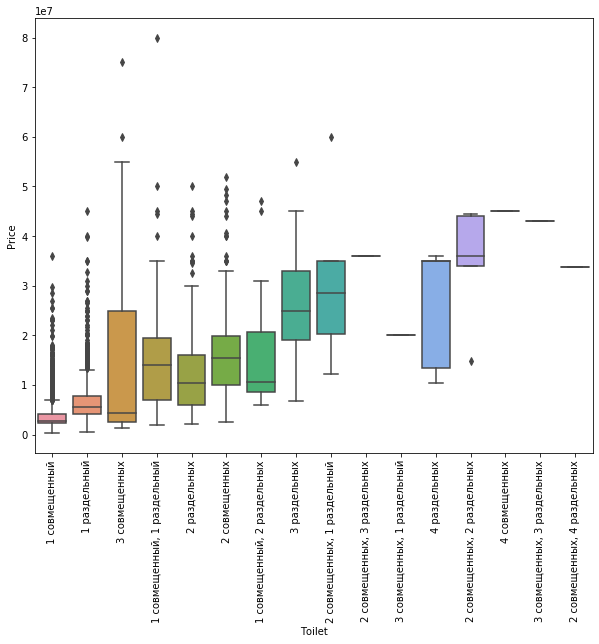

In [25]:
var = 'Toilet'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

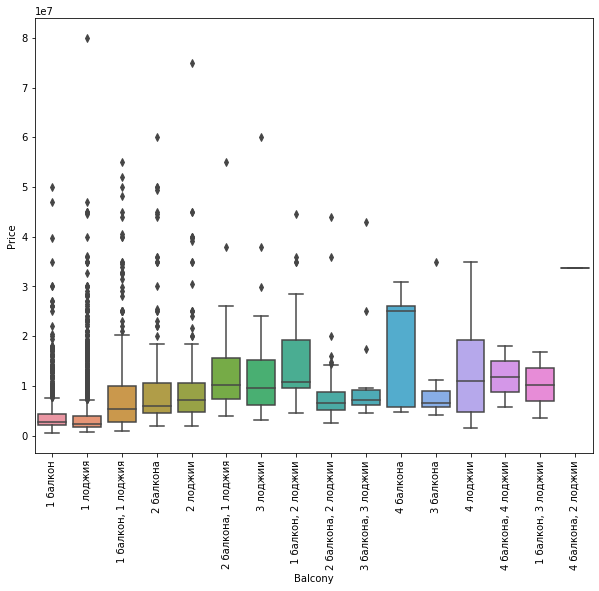

In [26]:
var = 'Balcony'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

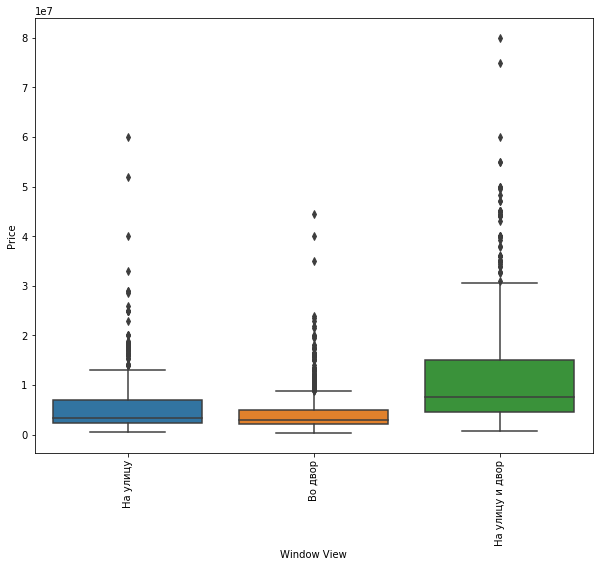

In [27]:
var = 'Window View'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

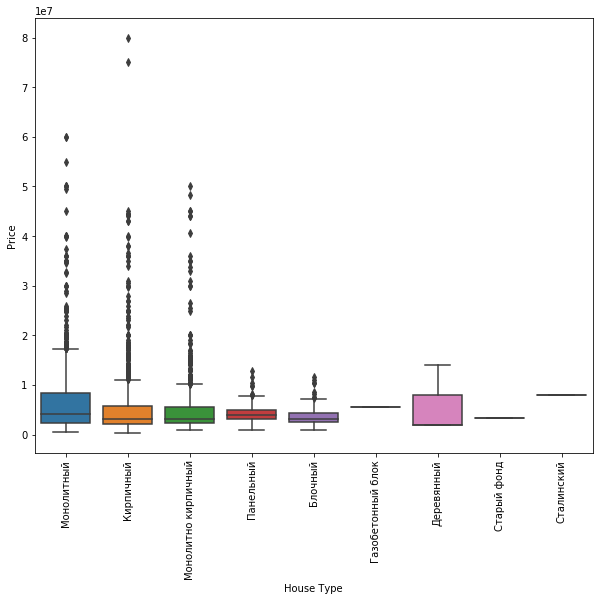

In [28]:
var = 'House Type'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

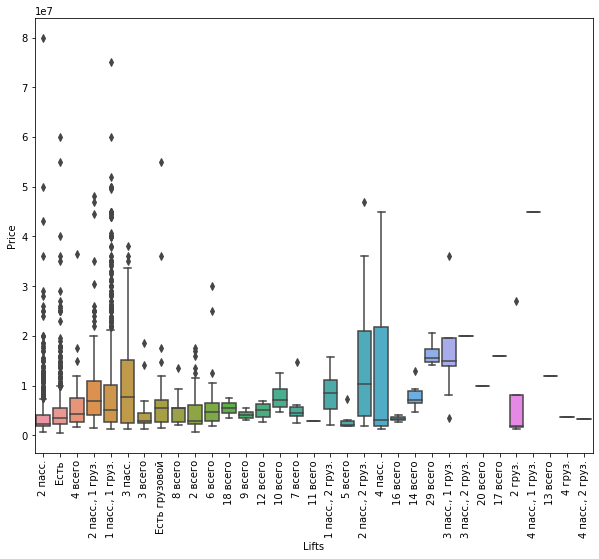

In [29]:
var = 'Lifts'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

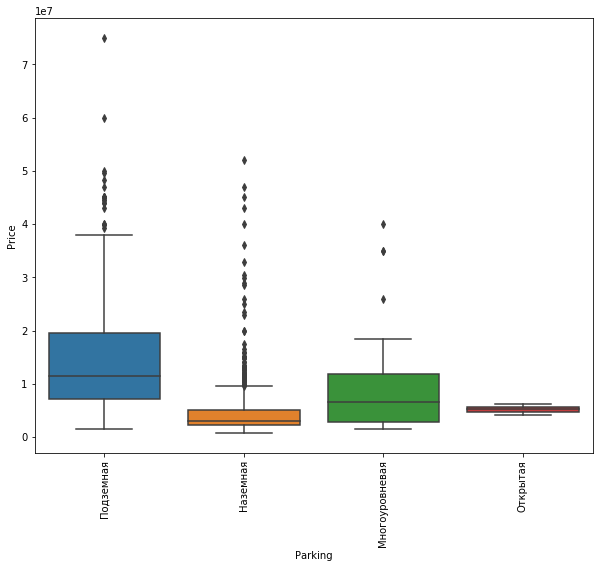

In [30]:
var = 'Parking'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

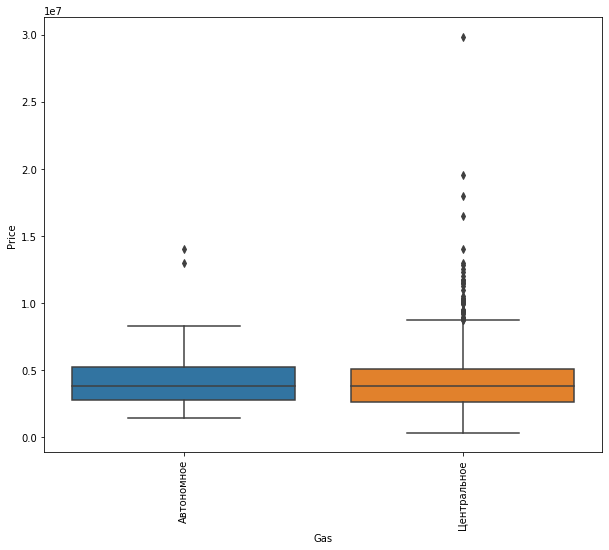

In [31]:
var = 'Gas'
concat = pd.concat([flats_data['Price'], flats_data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="Price", data=concat)
fig.axis()
plt.xticks(rotation=90)

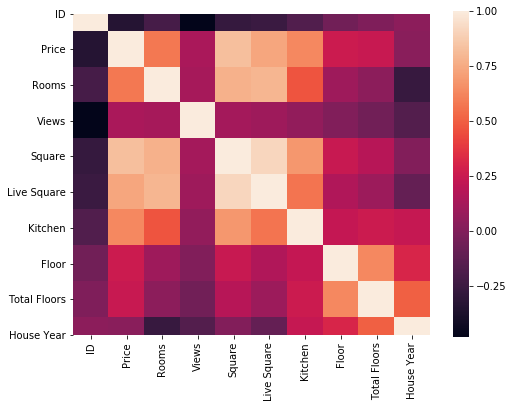

In [32]:
corrmat = flats_data.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, square=True)

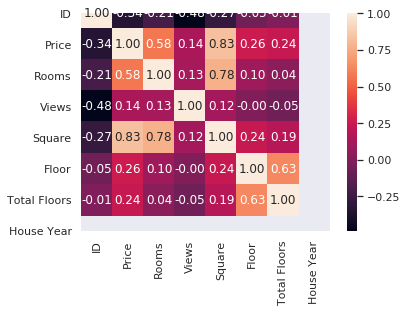

In [47]:
#number of variables for heatmap
cols = corrmat.drop(['Live Square', 'Kitchen']).index
cm = np.corrcoef(flats_data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

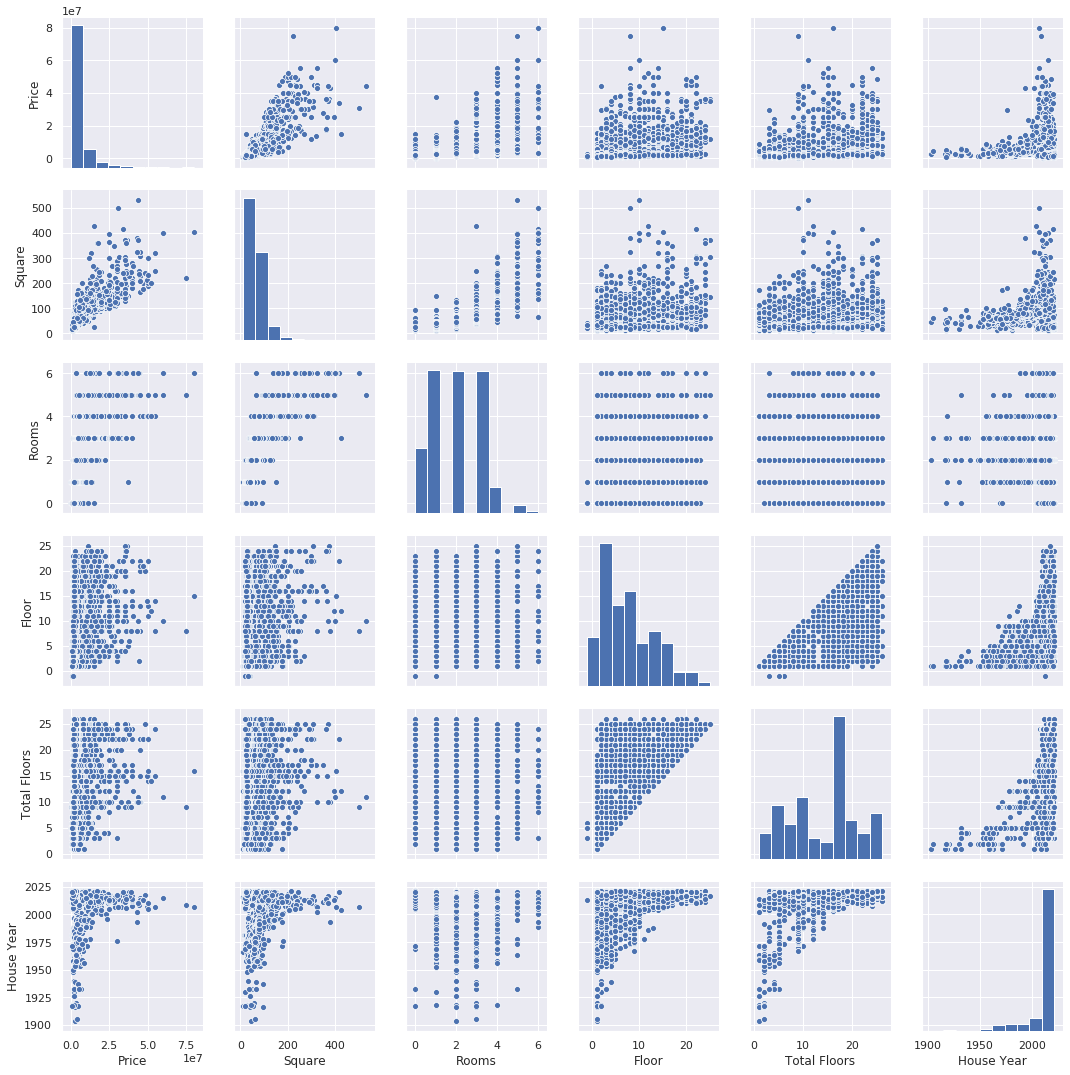

In [33]:
sns.set()
cols = ['Price', 'Square', 'Rooms', 'Floor', 'Total Floors', 'District', 'Toilet', 'Balcony', 'Repair', 
        'House Type', 'Lifts', 'Parking', 'House Year']
sns.pairplot(flats_data[cols], size = 2.5)
plt.show();